In [ ]:
import pandas as pd
import numpy as np
from dateutil import parser

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS Mini Project/Main files/moviesDb-raw-.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159725 entries, 0 to 159724
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   sr_no                 159725 non-null  int64  
 1   id                    159725 non-null  int64  
 2   title                 159725 non-null  object 
 3   original_title        159725 non-null  object 
 4   release_date          159681 non-null  object 
 5   budget                159725 non-null  int64  
 6   revenue               159681 non-null  float64
 7   popularity            159681 non-null  float64
 8   runtime               147606 non-null  float64
 9   vote_average          159681 non-null  float64
 10  vote_count            159681 non-null  float64
 11  adult                 159725 non-null  bool   
 12  status                159681 non-null  object 
 13  genres                138904 non-null  object 
 14  production_companies  102896 non-null  object 
 15  

# Data cleaning/Preprocessing

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159725 entries, 0 to 159724
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   sr_no                 159725 non-null  int64  
 1   id                    159725 non-null  int64  
 2   title                 159725 non-null  object 
 3   original_title        159725 non-null  object 
 4   release_date          159681 non-null  object 
 5   budget                159725 non-null  int64  
 6   revenue               159681 non-null  float64
 7   popularity            159681 non-null  float64
 8   runtime               147606 non-null  float64
 9   vote_average          159681 non-null  float64
 10  vote_count            159681 non-null  float64
 11  adult                 159725 non-null  bool   
 12  status                159681 non-null  object 
 13  genres                138904 non-null  object 
 14  production_companies  102896 non-null  object 
 15  

In [ ]:
df.head(5)

,sr_no,id,title,original_title,release_date,budget,revenue,popularity,runtime,vote_average,vote_count,adult,status,genres,production_companies,production_countries
0,1,741067,Welcome to Sudden Death,Welcome to Sudden Death,2020-09-29,0,0.0,1892.824,80.0,6.8,100.0,False,Released,Action,NaN,NaN
1,2,497582,Enola Holmes,Enola Holmes,2020-09-23,21000000,0.0,1317.089,123.0,7.6,1965.0,False,Released,Crime,PCMA Productions,Namibia
2,3,749544,Brutal Bridesmaids,Brutal Bridesmaids,2020-10-15,0,0.0,38.034,0.0,0.0,0.0,False,Released,Thriller,NaN,NaN
3,4,669666,Home,Home,2020-10-15,0,0.0,28.930,0.0,0.0,0.0,False,Released,NaN,NaN,NaN
4,5,528085,2067,2067,2020-10-01,0,0.0,1549.992,114.0,5.7,103.0,False,Released,Science Fiction,Arcadia,Australia


In [ ]:
# create year column
# convert release_date to have same format
for index, row in df.iterrows():
    try:
        date = parser.parse(row['release_date'])
        year = date.year
        newDate = f'{date.year}-{date.month}-{date.day}'
    except:     # if release_date is empty
        year = np.nan
        newDate = np.nan

    df.at[index, 'year'] = year
    df.at[index, 'release_date'] = newDate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159725 entries, 0 to 159724
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   sr_no                 159725 non-null  int64  
 1   id                    159725 non-null  int64  
 2   title                 159725 non-null  object 
 3   original_title        159725 non-null  object 
 4   release_date          159681 non-null  object 
 5   budget                159725 non-null  int64  
 6   revenue               159681 non-null  float64
 7   popularity            159681 non-null  float64
 8   runtime               147606 non-null  float64
 9   vote_average          159681 non-null  float64
 10  vote_count            159681 non-null  float64
 11  adult                 159725 non-null  bool   
 12  status                159681 non-null  object 
 13  genres                138904 non-null  object 
 14  production_companies  102896 non-null  object 
 15  

In [ ]:
df.head(5)

,sr_no,id,title,original_title,release_date,budget,revenue,popularity,runtime,vote_average,vote_count,adult,status,genres,production_companies,production_countries,year
0,1,741067,Welcome to Sudden Death,Welcome to Sudden Death,2020-9-29,0,0.0,1892.824,80.0,6.8,100.0,False,Released,Action,NaN,NaN,2020.0
1,2,497582,Enola Holmes,Enola Holmes,2020-9-23,21000000,0.0,1317.089,123.0,7.6,1965.0,False,Released,Crime,PCMA Productions,Namibia,2020.0
2,3,749544,Brutal Bridesmaids,Brutal Bridesmaids,2020-10-15,0,0.0,38.034,0.0,0.0,0.0,False,Released,Thriller,NaN,NaN,2020.0
3,4,669666,Home,Home,2020-10-15,0,0.0,28.930,0.0,0.0,0.0,False,Released,NaN,NaN,NaN,2020.0
4,5,528085,2067,2067,2020-10-1,0,0.0,1549.992,114.0,5.7,103.0,False,Released,Science Fiction,Arcadia,Australia,2020.0


In [ ]:
# remove unusable date
df = df[(df['runtime'] > 0) & (df['runtime'].notnull()) &
        (df['revenue'] != 0) & (df['revenue'].notnull()) &
        (df['budget'] != 0) & (df['budget'].notnull()) &
        (df['adult'] == False) & (df['adult'].notnull()) &
        (df['year'] >= 1970) & (df['year'].notnull()) &
        (df['vote_count'] >= 5) & (df['vote_count'].notnull()) &
        (df['production_companies'].notnull()) &
        (df['genres'].notnull())
        ]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6040 entries, 7 to 159703
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sr_no                 6040 non-null   int64  
 1   id                    6040 non-null   int64  
 2   title                 6040 non-null   object 
 3   original_title        6040 non-null   object 
 4   release_date          6040 non-null   object 
 5   budget                6040 non-null   int64  
 6   revenue               6040 non-null   float64
 7   popularity            6040 non-null   float64
 8   runtime               6040 non-null   float64
 9   vote_average          6040 non-null   float64
 10  vote_count            6040 non-null   float64
 11  adult                 6040 non-null   bool   
 12  status                6040 non-null   object 
 13  genres                6040 non-null   object 
 14  production_companies  6040 non-null   object 
 15  production_countries  60

In [ ]:
# create success column
# movie is successful if (revenue >= budget * 2)
for index, row in df.iterrows():
    try:
        budget = df.at[index, 'budget']
        revenue = df.at[index, 'revenue']
        if (revenue >= budget * 2):
            success = True
        else:
            success = False
    except:     # if budget or revenue is empty
        success = np.nan

    df.at[index, 'success'] = success

<ipython-input-14-530e03b2d6cd>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, 'success'] = success


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6040 entries, 7 to 159703
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sr_no                 6040 non-null   int64  
 1   id                    6040 non-null   int64  
 2   title                 6040 non-null   object 
 3   original_title        6040 non-null   object 
 4   release_date          6040 non-null   object 
 5   budget                6040 non-null   int64  
 6   revenue               6040 non-null   float64
 7   popularity            6040 non-null   float64
 8   runtime               6040 non-null   float64
 9   vote_average          6040 non-null   float64
 10  vote_count            6040 non-null   float64
 11  adult                 6040 non-null   bool   
 12  status                6040 non-null   object 
 13  genres                6040 non-null   object 
 14  production_companies  6040 non-null   object 
 15  production_countries  60

In [ ]:
df.head(5)

,sr_no,id,title,original_title,release_date,budget,revenue,popularity,runtime,vote_average,vote_count,adult,status,genres,production_companies,production_countries,year,success
7,8,337401,Mulan,Mulan,2020-9-4,200000000,57000000.0,936.725,115.0,7.3,2445.0,False,Released,Action,Walt Disney Pictures,United States of America,2020.0,False
15,16,581392,Peninsula,반도,2020-7-15,17000000,35878266.0,641.633,114.0,7.1,602.0,False,Released,Action,Next Entertainment World,South Korea,2020.0,True
32,33,495764,Birds of Prey (and the Fantabulous Emancipatio...,Birds of Prey (and the Fantabulous Emancipatio...,2020-2-5,75000000,201858461.0,361.237,109.0,7.2,6022.0,False,Released,Action,DC Entertainment,United States of America,2020.0,True
34,35,38700,Bad Boys for Life,Bad Boys for Life,2020-1-15,90000000,419074646.0,337.346,124.0,7.2,5392.0,False,Released,Thriller,Columbia Pictures,United States of America,2020.0,True
42,44,338762,Bloodshot,Bloodshot,2020-3-5,42000000,30234182.0,253.895,110.0,7.0,3216.0,False,Released,Action,Sony Pictures,United States of America,2020.0,False


In [ ]:
df = df.sort_values(by = ['release_date'])

In [ ]:
# remove unused features
df = df.drop(columns=['sr_no',
                      'original_title',
                      'release_date',
                      'adult',
                      'popularity',
                      'status',
                      'production_companies'
                      ])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6040 entries, 40155 to 7
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6040 non-null   int64  
 1   title                 6040 non-null   object 
 2   budget                6040 non-null   int64  
 3   revenue               6040 non-null   float64
 4   runtime               6040 non-null   float64
 5   vote_average          6040 non-null   float64
 6   vote_count            6040 non-null   float64
 7   genres                6040 non-null   object 
 8   production_countries  6040 non-null   object 
 9   year                  6040 non-null   float64
 10  success               6040 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 566.2+ KB


In [ ]:
df.head(5)

,id,title,budget,revenue,runtime,vote_average,vote_count,genres,production_countries,year,success
40155,11202,Patton,12000000,89800000.0,172.0,7.5,665.0,Drama,United States of America,1970.0,True
9163,11165,Tora! Tora! Tora!,25485000,29548291.0,144.0,7.1,294.0,Drama,United States of America,1970.0,False
52978,33157,Waterloo,25000000,3052000.0,128.0,7.1,87.0,History,United States of America,1970.0,False
131606,5185,The Private Life of Sherlock Holmes,10000000,1500000.0,125.0,6.9,156.0,Adventure,Namibia,1970.0,False
36601,11040,Little Big Man,15000000,31559552.0,139.0,7.6,340.0,Adventure,Namibia,1970.0,True


In [ ]:
df = df.rename(columns={'genres': 'genre', 'production_countries': 'country' })

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6040 entries, 40155 to 7
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6040 non-null   int64  
 1   title         6040 non-null   object 
 2   budget        6040 non-null   int64  
 3   revenue       6040 non-null   float64
 4   runtime       6040 non-null   float64
 5   vote_average  6040 non-null   float64
 6   vote_count    6040 non-null   float64
 7   genre         6040 non-null   object 
 8   country       6040 non-null   object 
 9   year          6040 non-null   float64
 10  success       6040 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 566.2+ KB


In [ ]:
#df.to_csv('MOVIESDB-clean-.csv', encoding='utf-8', index=False)
print('Preprocessing Finished')

Preprocessing Finished


# EDA

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/DS Mini Project/Main files/moviesDb-clean-.csv')


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6040 non-null   int64  
 1   title         6040 non-null   object 
 2   budget        6040 non-null   int64  
 3   revenue       6040 non-null   float64
 4   runtime       6040 non-null   float64
 5   vote_average  6040 non-null   float64
 6   vote_count    6040 non-null   float64
 7   genre         6040 non-null   object 
 8   country       6040 non-null   object 
 9   year          6040 non-null   float64
 10  success       6040 non-null   bool   
dtypes: bool(1), float64(5), int64(2), object(3)
memory usage: 477.9+ KB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

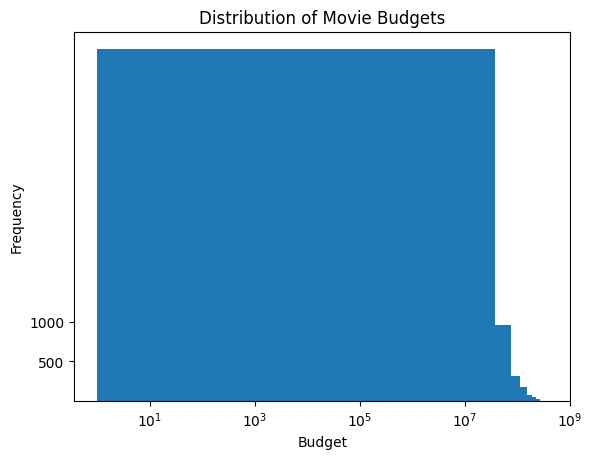

In [ ]:
#distribution of movie budgets
plt.hist(df2['budget'], bins=10)
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Budgets')
plt.xscale('log')
plt.yticks([500,1000])
plt.show()

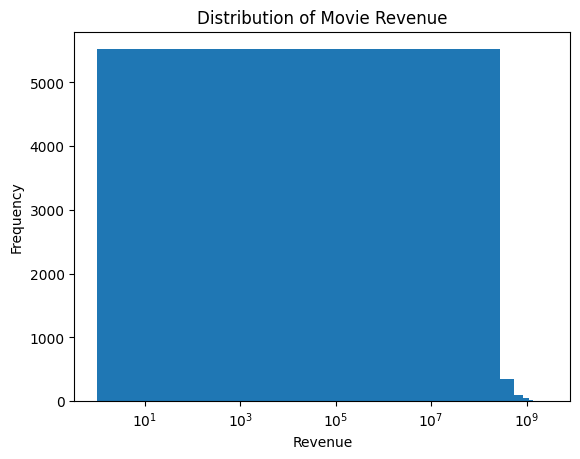

In [ ]:
#Movie Revenue distribution
plt.hist(df2['revenue'], bins=10)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Revenue')
plt.xscale('log')
plt.show()

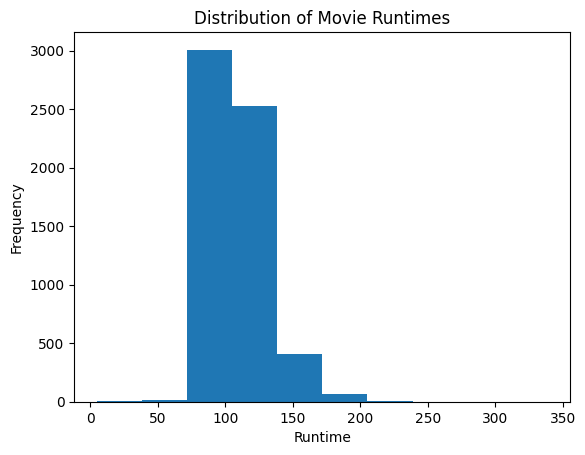

In [ ]:
#Movie Runtime Distribution
plt.hist(df2['runtime'], bins=10)
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.show()

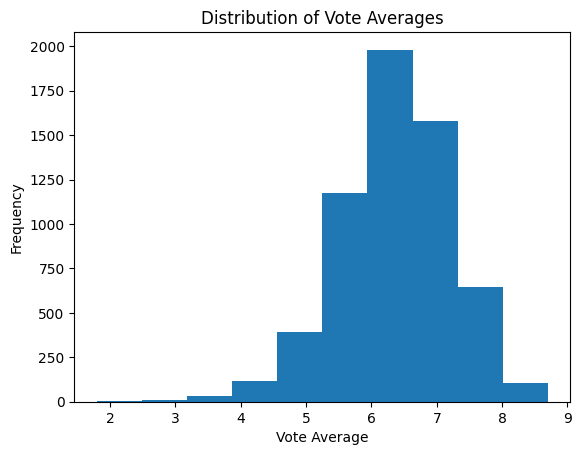

In [ ]:
#Vote average distribution
plt.hist(df2['vote_average'], bins=10)
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.title('Distribution of Vote Averages')
plt.show()

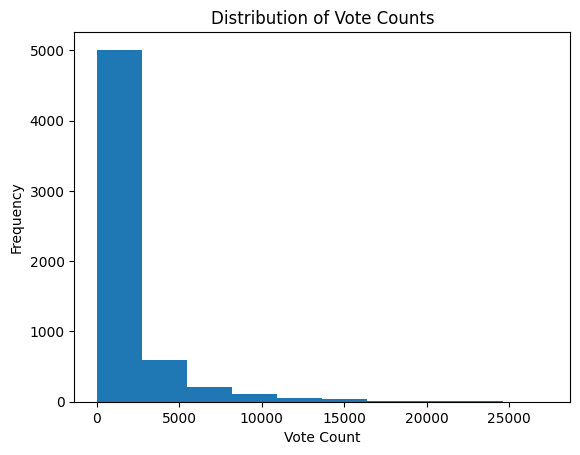

In [ ]:
#Vote count distribution
plt.hist(df2['vote_count'], bins=10)
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.title('Distribution of Vote Counts')
plt.show()

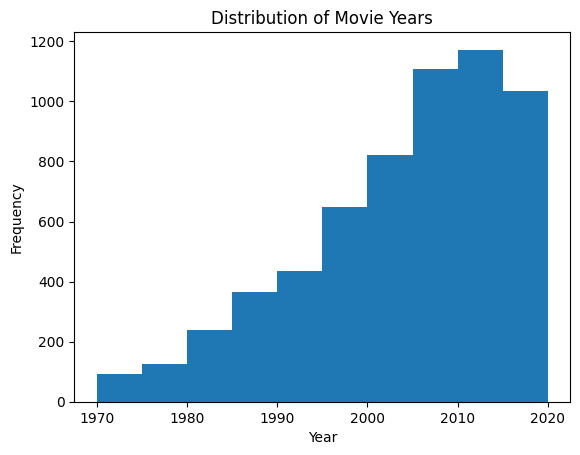

In [ ]:
#year distribution
plt.hist(df2['year'], bins=10)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Years')
plt.show()

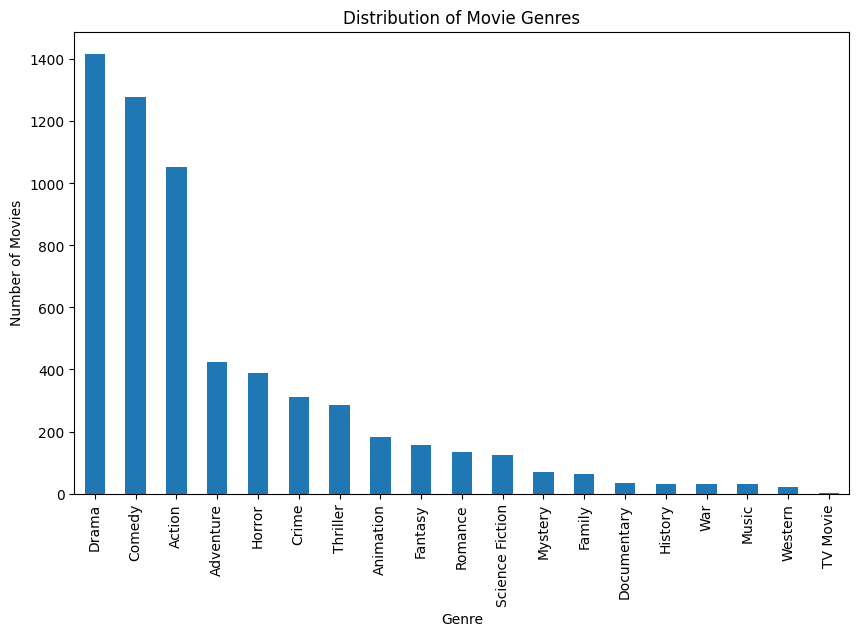

In [ ]:
#genre distribution
plt.figure(figsize=(10, 6))
df2['genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=90)
plt.show()

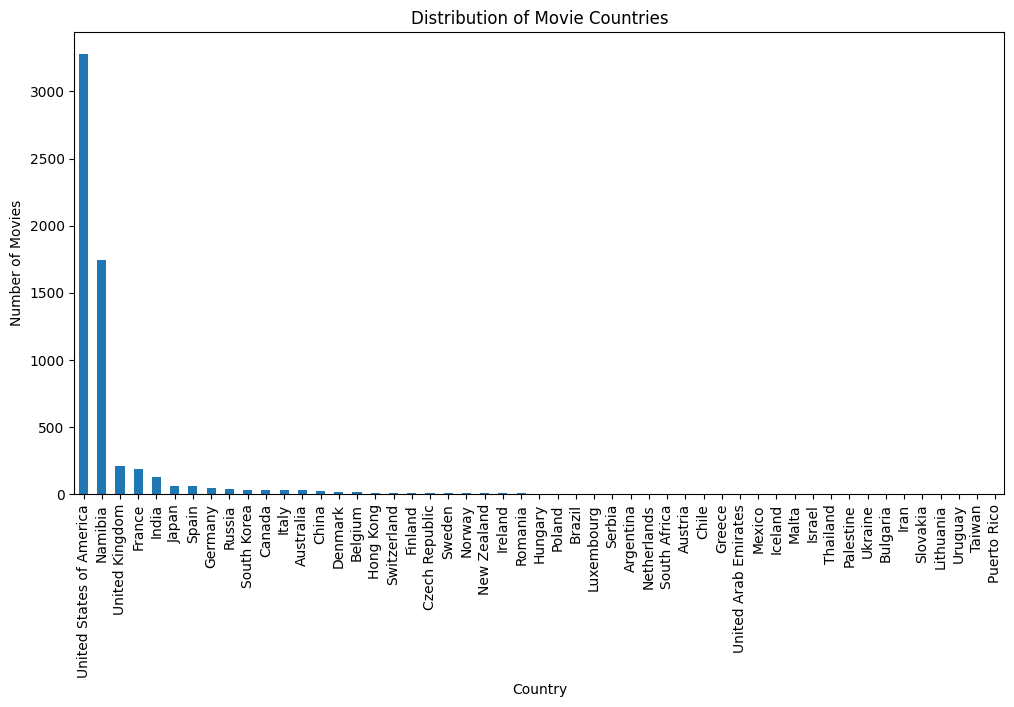

In [ ]:
#countries distribution
plt.figure(figsize=(12, 6))
df2['country'].value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Countries')
plt.xticks(rotation=90)
plt.show()

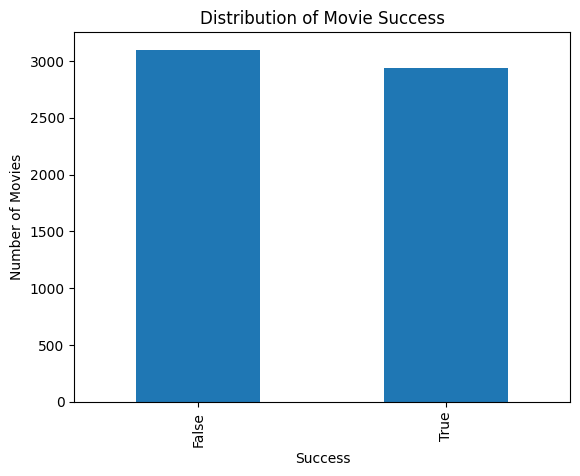

In [ ]:
#Sucess distribution
df2['success'].value_counts().plot(kind='bar')
plt.xlabel('Success')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Success')
plt.show()

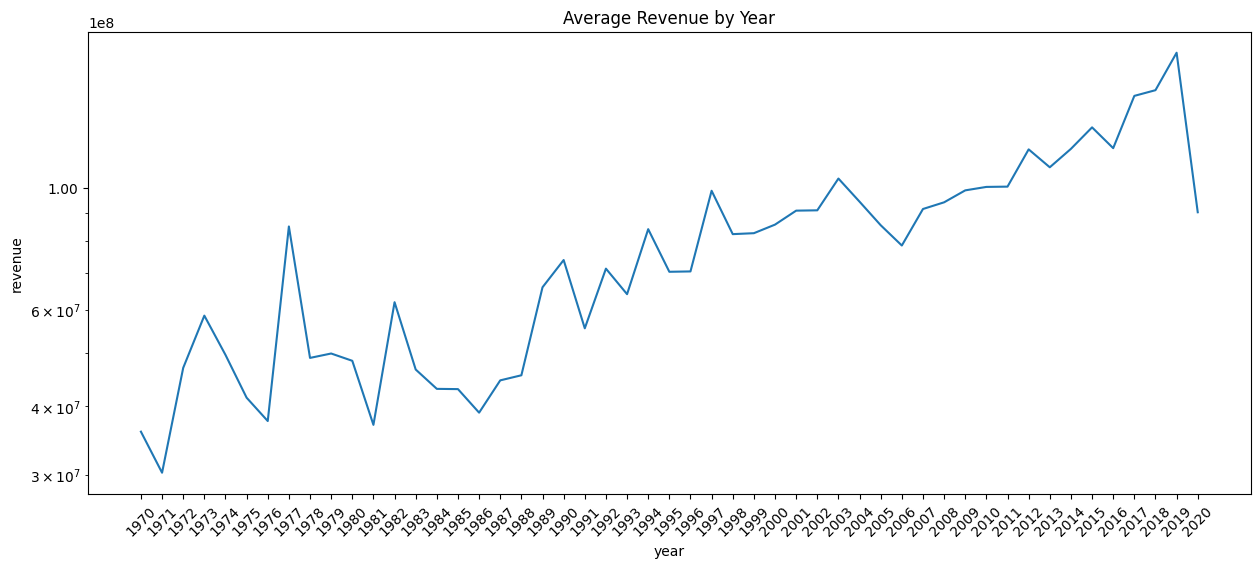

In [ ]:
#Distribution by year
from matplotlib.ticker import ScalarFormatter # import the ScalarFormatter class

plt.figure(figsize=(15, 6))
ax = df2.groupby('year').revenue.mean().plot(title='Average Revenue by Year', rot=45)
ax.set_ylabel('revenue')
# Convert min and max values to integers using int()
plt.xticks(range(int(df2['year'].min()), int(df2['year'].max())+1))
plt.yscale('log')
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.show()

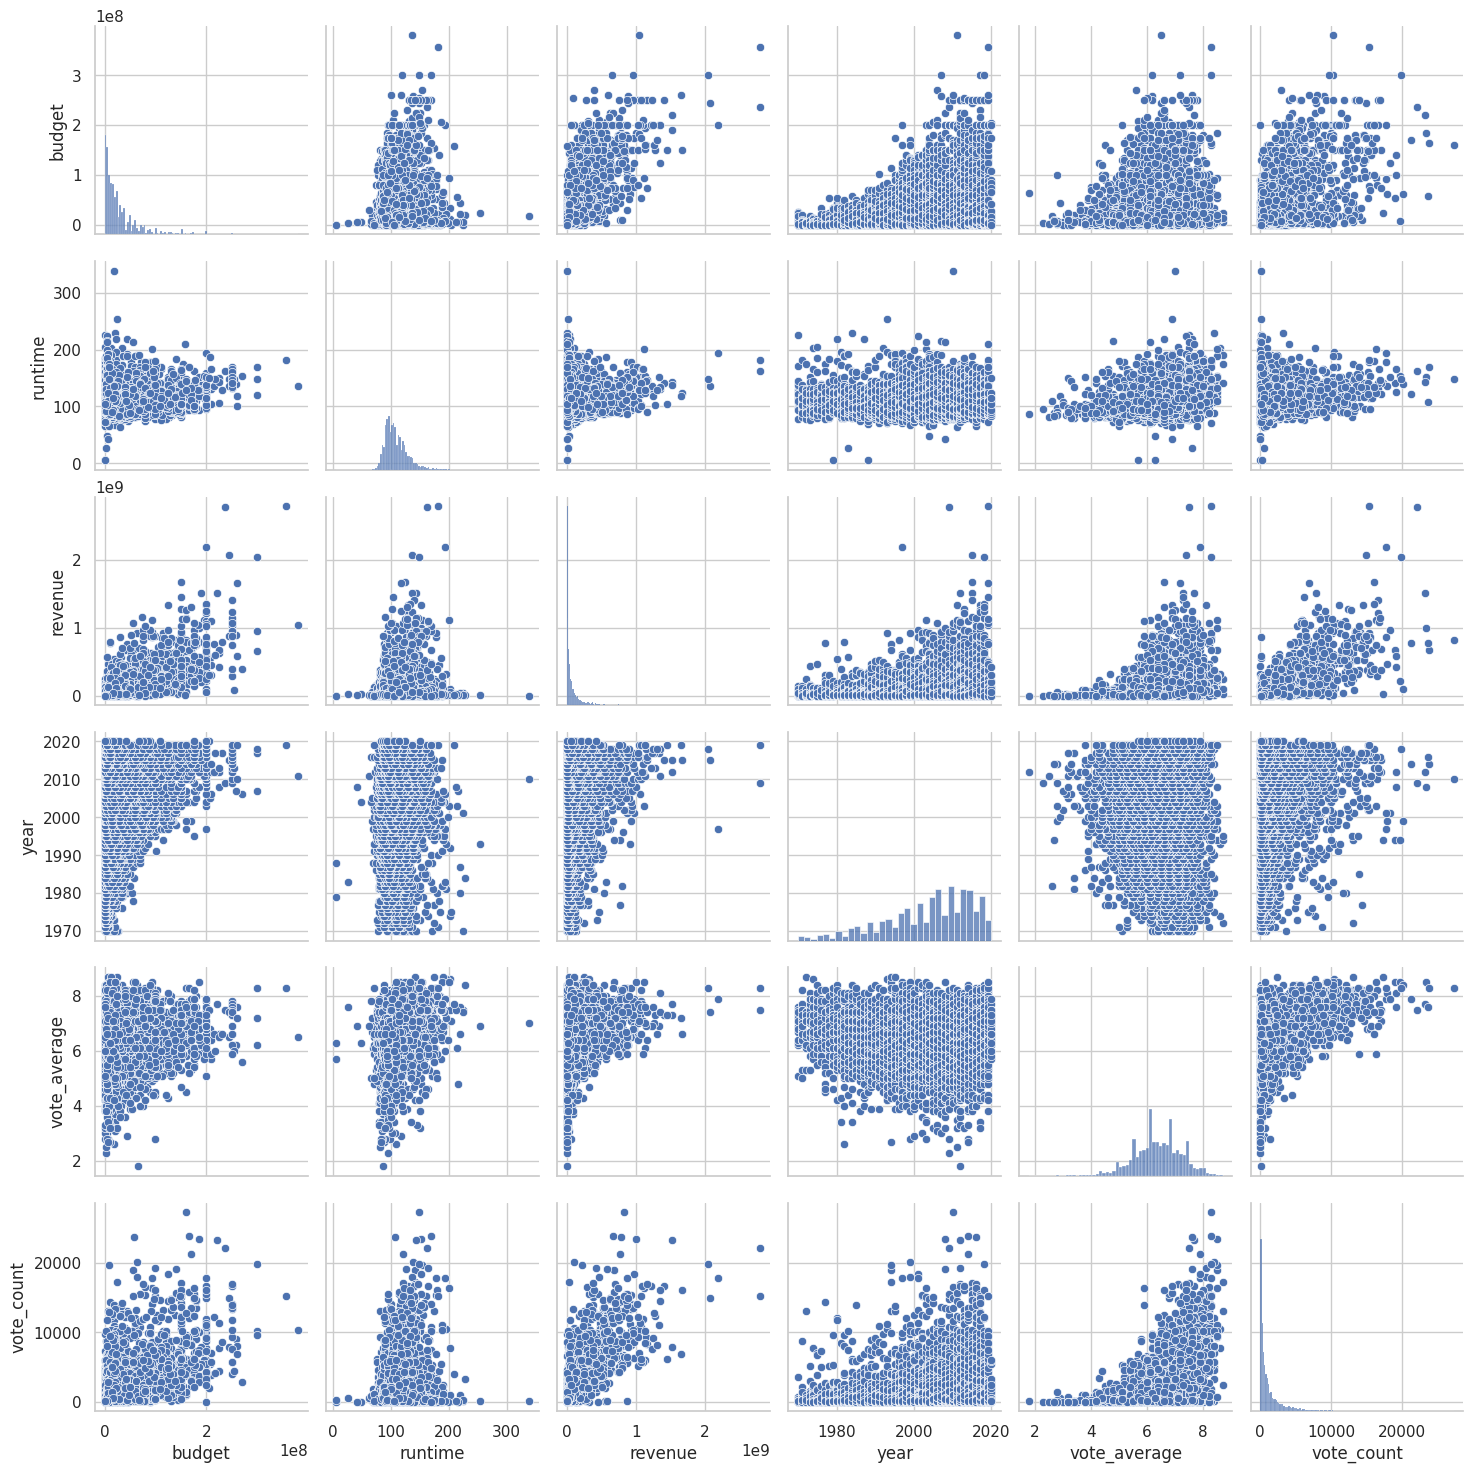

In [ ]:
# scatterplot matrix
cols = ['budget', 'runtime', 'revenue', 'year', 'vote_average', 'vote_count']
sns.set(style='whitegrid', context='notebook')
ax = sns.pairplot(df2[cols])
plt.show()

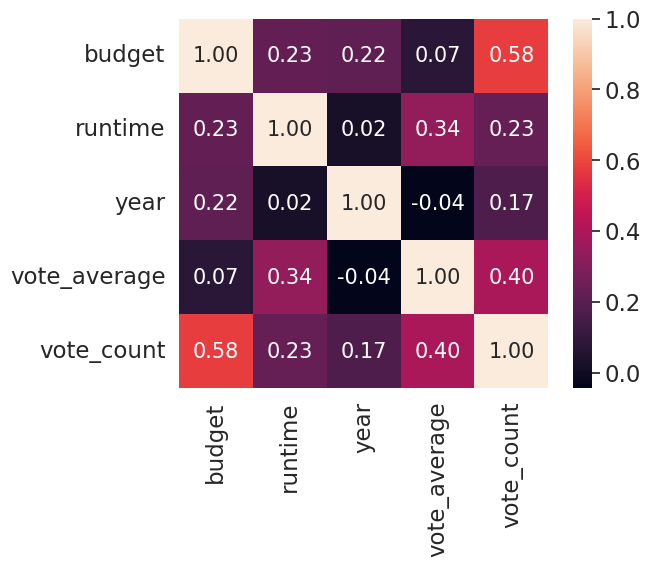

In [ ]:
# heatmap
cols = ['budget', 'runtime', 'year', 'vote_average', 'vote_count'] # Changed to lowercase
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
           cbar=True,
           annot=True,
           square=True,
           fmt='.2f',
           annot_kws={'size': 15},
           yticklabels=cols,
           xticklabels=cols)
plt.show()

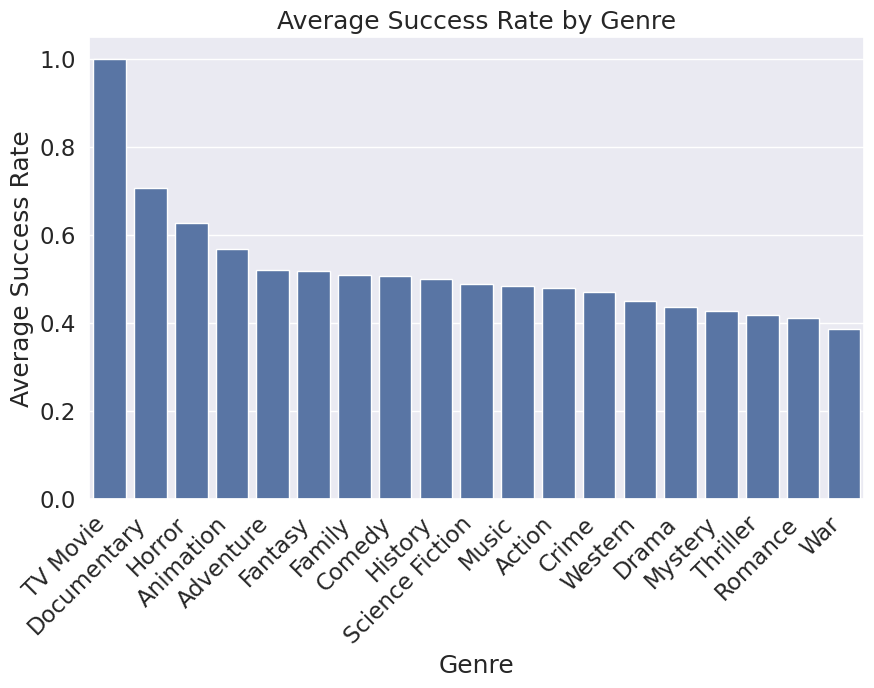

In [ ]:
# Group data by genre and calculate the average success rate
genre_success = df2.groupby('genre')['success'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_success.index, y=genre_success.values)
plt.title('Average Success Rate by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Success Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

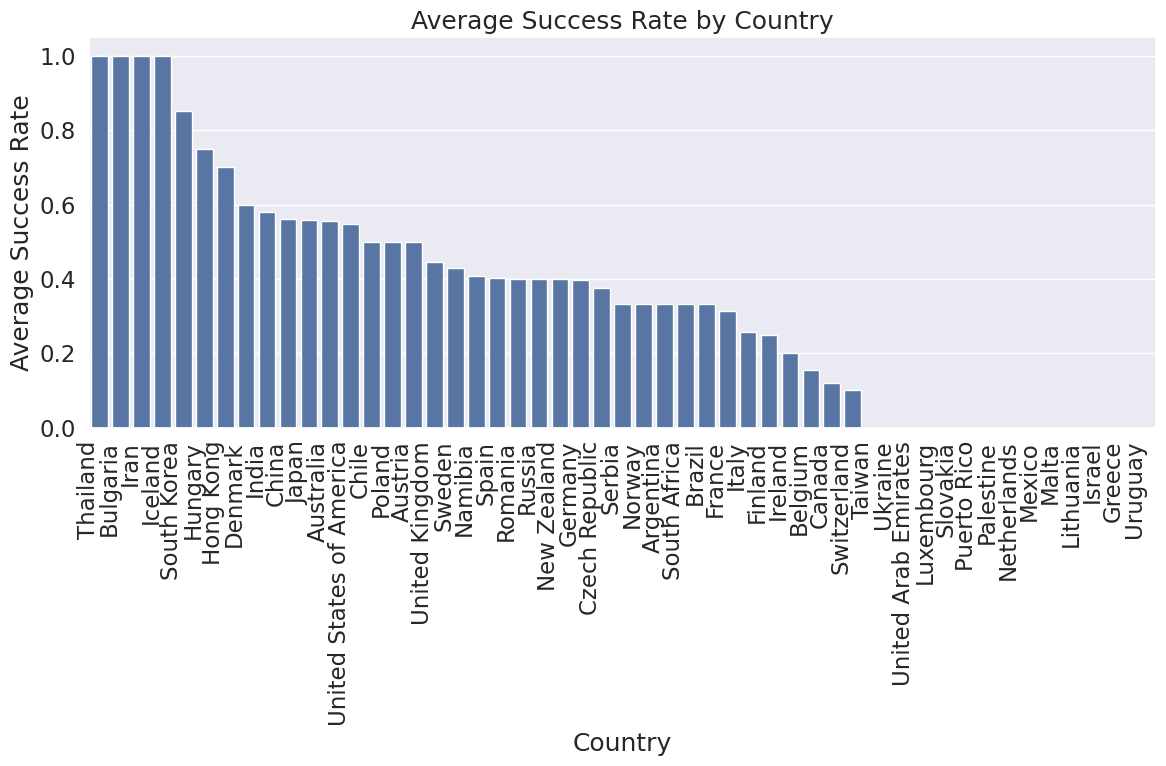

In [ ]:
# Group data by country and calculate the average success rate
country_success = df2.groupby('country')['success'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12,8 ))
sns.barplot(x=country_success.index, y=country_success.values)
plt.title('Average Success Rate by Country')
plt.xlabel('Country')
plt.ylabel('Average Success Rate')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

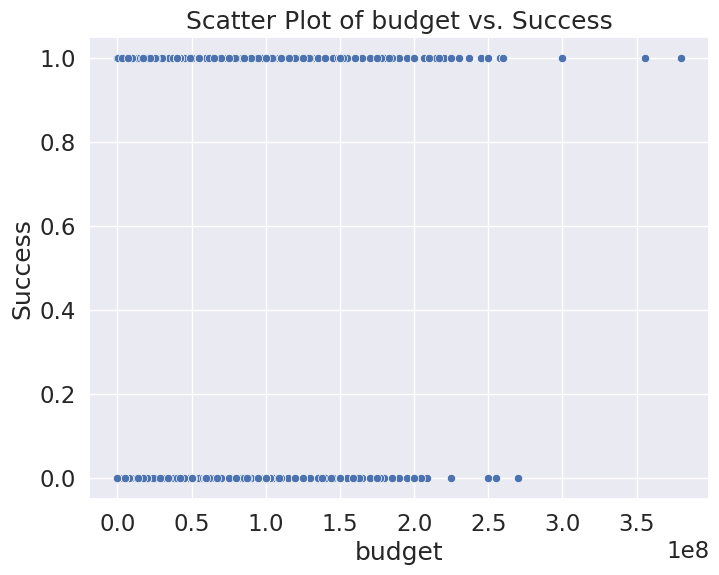

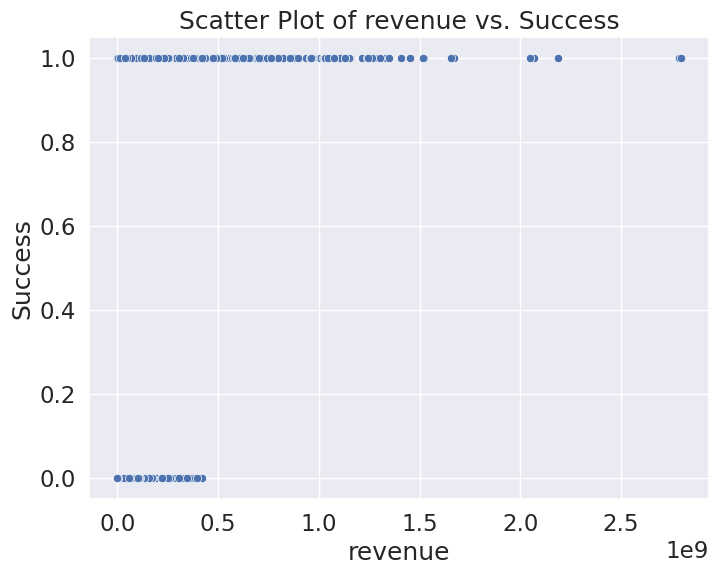

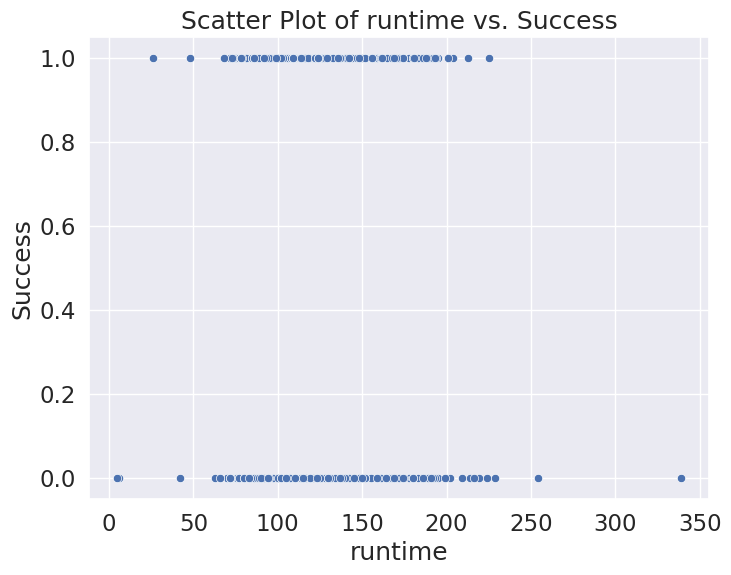

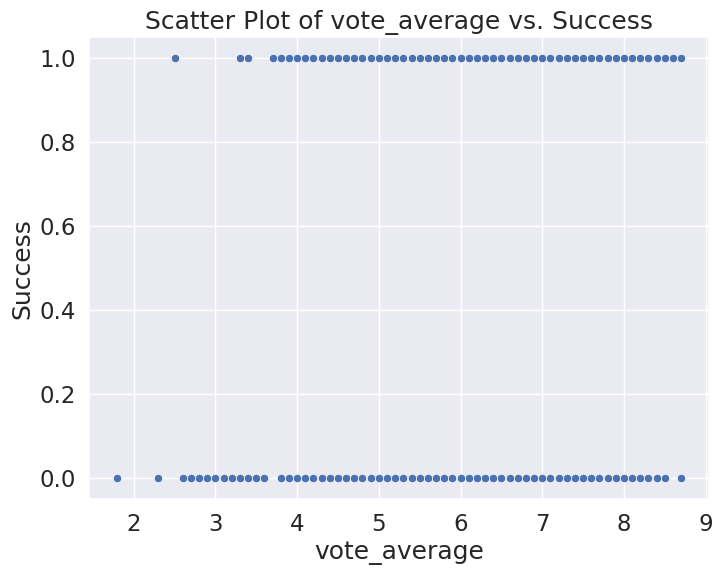

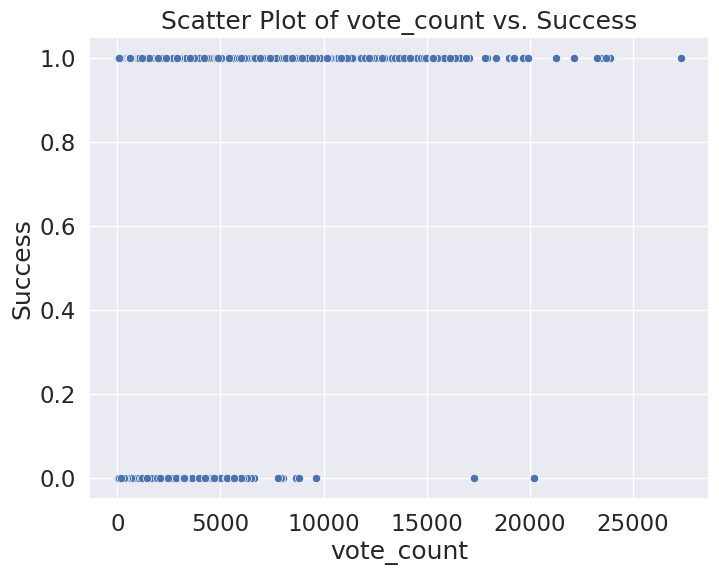

In [ ]:
features = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='success', data=df2)
    plt.title(f'Scatter Plot of {feature} vs. Success')
    plt.xlabel(feature)
    plt.ylabel('Success')
    plt.show()

# Classification/Prediction



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS Mini Project/Main files/moviesDb-clean-.csv')

predictors = ['budget','runtime','year','vote_average','vote_count','genre']
x_dummy = pd.get_dummies(df.loc[:,predictors])

x = df[predictors].values
y = df['success'].values

In [ ]:
# print grid search results
def print_cv_results(gs, title):

    print(title)

    print(f'Best Score = {gs.best_score_:.4f}')
    print(f'Best Hyper-parameters = {gs.best_params_}')
    print()

    print('Test Scores:')
    test_means = gs.cv_results_['mean_test_score']
    test_stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(test_means, test_stds, gs.cv_results_['params']):
        print(f'{mean:.4f} (+/-{std:.3f}) for {params}')
    print()

    print('Training Scores:')
    train_means = gs.cv_results_['mean_train_score']
    train_stds = gs.cv_results_['std_train_score']
    for mean, std, params in zip(train_means, train_stds, gs.cv_results_['params']):
        print(f'{mean:.4f} (+/-{std:.3f}) for {params}')

In [ ]:
# save grid search results to file
def save_cv_results(gs, title, fileName):
    with open(fileName, 'a') as f:

        print(title, file=f)

        print(f'Best Score = {gs.best_score_:.4f}', file=f)
        print(f'Best Hyper-parameters = {gs.best_params_}', file=f)
        print('', file=f)

        print('Test Scores:', file=f)
        test_means = gs.cv_results_['mean_test_score']
        test_stds = gs.cv_results_['std_test_score']
        for mean, std, params in zip(test_means, test_stds, gs.cv_results_['params']):
            print(f'{mean:.4f} (+/-{std:.3f}) for {params}', file=f)
        print('', file=f)

        print('Training Scores:', file=f)
        train_means = gs.cv_results_['mean_train_score']
        train_stds = gs.cv_results_['std_train_score']
        for mean, std, params in zip(train_means, train_stds, gs.cv_results_['params']):
            print(f'{mean:.4f} (+/-{std:.3f}) for {params}', file=f)

In [ ]:
# Logistic Regression
logReg = LogisticRegression()
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {'C': c_list,
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}

gs = GridSearchCV(estimator=logReg,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  return_train_score=True)
gs = gs.fit(x_dummy, y)
print_cv_results(gs, 'Logistic Regression Accuracy')

# Print the best accuracy for Logistic Regression
print(f'Logistic Regression Accuracy: {gs.best_score_:.2%}')


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:44: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py

Logistic Regression Accuracy
Best Score = 0.7023
Best Hyper-parameters = {'C': 0.1, 'solver': 'newton-cg'}

Test Scores:
0.6975 (+/-0.034) for {'C': 0.001, 'solver': 'newton-cg'}
0.5250 (+/-0.080) for {'C': 0.001, 'solver': 'lbfgs'}
0.4882 (+/-0.004) for {'C': 0.001, 'solver': 'sag'}
0.4882 (+/-0.004) for {'C': 0.001, 'solver': 'saga'}
0.6993 (+/-0.031) for {'C': 0.01, 'solver': 'newton-cg'}
0.5250 (+/-0.080) for {'C': 0.01, 'solver': 'lbfgs'}
0.4882 (+/-0.004) for {'C': 0.01, 'solver': 'sag'}
0.4882 (+/-0.004) for {'C': 0.01, 'solver': 'saga'}
0.7023 (+/-0.031) for {'C': 0.1, 'solver': 'newton-cg'}
0.5250 (+/-0.080) for {'C': 0.1, 'solver': 'lbfgs'}
0.4882 (+/-0.004) for {'C': 0.1, 'solver': 'sag'}
0.4881 (+/-0.004) for {'C': 0.1, 'solver': 'saga'}
0.6987 (+/-0.032) for {'C': 1, 'solver': 'newton-cg'}
0.5250 (+/-0.080) for {'C': 1, 'solver': 'lbfgs'}
0.4882 (+/-0.004) for {'C': 1, 'solver': 'sag'}
0.4881 (+/-0.004) for {'C': 1, 'solver': 'saga'}
0.6997 (+/-0.030) for {'C': 10, 'solver

In [ ]:
import pickle

# save the model to disk
filename = 'logisticReg_model.sav'
pickle.dump(gs, open(filename, 'wb'))

KNN Accuracy
Best Score = 0.6745
Best Hyper-parameters = {'n_neighbors': 11}

Test Scores:
0.6316 (+/-0.023) for {'n_neighbors': 1}
0.6531 (+/-0.022) for {'n_neighbors': 3}
0.6626 (+/-0.028) for {'n_neighbors': 5}
0.6682 (+/-0.030) for {'n_neighbors': 7}
0.6727 (+/-0.029) for {'n_neighbors': 9}
0.6745 (+/-0.031) for {'n_neighbors': 11}
0.6733 (+/-0.029) for {'n_neighbors': 13}
0.6704 (+/-0.027) for {'n_neighbors': 15}
0.6675 (+/-0.025) for {'n_neighbors': 17}
0.6719 (+/-0.025) for {'n_neighbors': 19}
0.6689 (+/-0.026) for {'n_neighbors': 21}
0.6677 (+/-0.022) for {'n_neighbors': 23}
0.6593 (+/-0.022) for {'n_neighbors': 25}

Training Scores:
1.0000 (+/-0.000) for {'n_neighbors': 1}
0.8192 (+/-0.003) for {'n_neighbors': 3}
0.7739 (+/-0.003) for {'n_neighbors': 5}
0.7517 (+/-0.003) for {'n_neighbors': 7}
0.7415 (+/-0.003) for {'n_neighbors': 9}
0.7372 (+/-0.004) for {'n_neighbors': 11}
0.7304 (+/-0.004) for {'n_neighbors': 13}
0.7244 (+/-0.004) for {'n_neighbors': 15}
0.7194 (+/-0.004) f

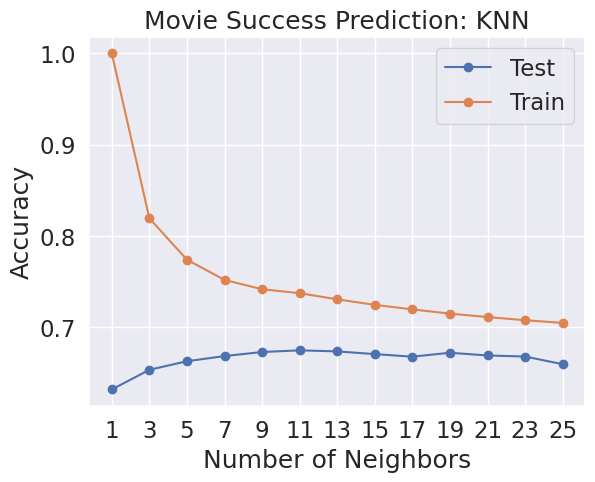

KNN Accuracy: 67.45%


In [ ]:
# # KNN
knn = KNeighborsClassifier()
k_list = list(range(1, 26, 2))
param_grid = [{'n_neighbors': k_list}]

gs = GridSearchCV(estimator=knn,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  return_train_score=True)
gs = gs.fit(x_dummy, y)
print_cv_results(gs, 'KNN Accuracy')


test_means = gs.cv_results_['mean_test_score']
train_means = gs.cv_results_['mean_train_score']

plt.plot(k_list, test_means, marker='o', label='Test')
plt.plot(k_list, train_means, marker='o', label='Train')
plt.xticks(k_list)

plt.title('Movie Success Prediction: KNN')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()
plt.show()

# Print the best accuracy for KNN
print(f'KNN Accuracy: {gs.best_score_:.2%}')

Decision Tree Regression Accuracy
Best Score = 0.6715
Best Hyper-parameters = {'max_depth': 5}

Test Scores:
0.6606 (+/-0.041) for {'max_depth': 1}
0.6396 (+/-0.046) for {'max_depth': 2}
0.6685 (+/-0.056) for {'max_depth': 3}
0.6664 (+/-0.063) for {'max_depth': 4}
0.6715 (+/-0.061) for {'max_depth': 5}
0.6685 (+/-0.067) for {'max_depth': 6}
0.6646 (+/-0.066) for {'max_depth': 7}
0.6671 (+/-0.067) for {'max_depth': 8}
0.6593 (+/-0.060) for {'max_depth': 9}
0.6442 (+/-0.079) for {'max_depth': 10}

Training Scores:
0.6672 (+/-0.007) for {'max_depth': 1}
0.6731 (+/-0.011) for {'max_depth': 2}
0.6999 (+/-0.006) for {'max_depth': 3}
0.7224 (+/-0.006) for {'max_depth': 4}
0.7371 (+/-0.007) for {'max_depth': 5}
0.7534 (+/-0.007) for {'max_depth': 6}
0.7753 (+/-0.006) for {'max_depth': 7}
0.7994 (+/-0.007) for {'max_depth': 8}
0.8247 (+/-0.006) for {'max_depth': 9}
0.8496 (+/-0.007) for {'max_depth': 10}
Decision Tree Regression Accuracy
Best Score = 0.6745
Best Hyper-parameters = {'max_depth':

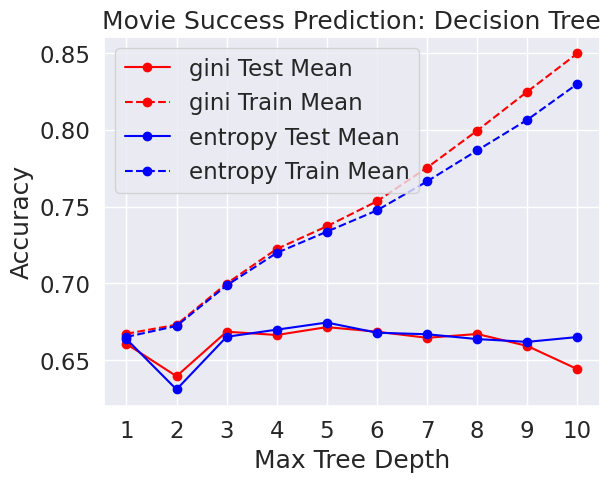

Decision Tree Accuracy: 67.45%


In [ ]:
# Decision Tree
criterions = ['gini', 'entropy']
colors = ['red', 'blue']
depth_list = list(range(1,11))

# Initialize best_accuracy_tree before the loop
best_accuracy_tree = 0.0  # Start with a default value

for i in range(len(criterions)):
    tree = DecisionTreeClassifier(criterion=criterions[i])
    param_grid = [{'max_depth': depth_list}]
    gs = GridSearchCV(estimator=tree,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=10,
                      return_train_score=True) # set return_train_score to True to store training scores
    gs = gs.fit(x_dummy, y)
    print_cv_results(gs, 'Decision Tree Regression Accuracy')

    test_means = gs.cv_results_['mean_test_score']
    train_means = gs.cv_results_['mean_train_score']

    plt.plot(depth_list, test_means, marker='o', label=f'{criterions[i]} Test Mean',
                color=colors[i])
    plt.plot(depth_list, train_means, marker='o', label=f'{criterions[i]} Train Mean',
                linestyle='dashed', color=colors[i])
    # Update best_accuracy_tree if a better accuracy is found
    if gs.best_score_ > best_accuracy_tree:
        best_accuracy_tree = gs.best_score_

plt.xticks(depth_list)
plt.title(f'Movie Success Prediction: Decision Tree')
plt.ylabel('Accuracy')
plt.xlabel('Max Tree Depth')
plt.legend()
plt.show()

# Print the best accuracy for Decision Tree
print(f'Decision Tree Accuracy: {best_accuracy_tree:.2%}')

Random Forest Accuracy
Best Score = 0.6886
Best Hyper-parameters = {'n_estimators': 8}

Test Scores:
0.6359 (+/-0.040) for {'n_estimators': 1}
0.6656 (+/-0.033) for {'n_estimators': 2}
0.6576 (+/-0.062) for {'n_estimators': 3}
0.6667 (+/-0.069) for {'n_estimators': 4}
0.6768 (+/-0.055) for {'n_estimators': 5}
0.6793 (+/-0.053) for {'n_estimators': 6}
0.6740 (+/-0.063) for {'n_estimators': 7}
0.6886 (+/-0.047) for {'n_estimators': 8}
0.6778 (+/-0.064) for {'n_estimators': 9}
0.6760 (+/-0.065) for {'n_estimators': 10}

Training Scores:
0.6946 (+/-0.028) for {'n_estimators': 1}
0.7410 (+/-0.009) for {'n_estimators': 2}
0.7449 (+/-0.014) for {'n_estimators': 3}
0.7560 (+/-0.010) for {'n_estimators': 4}
0.7601 (+/-0.009) for {'n_estimators': 5}
0.7638 (+/-0.007) for {'n_estimators': 6}
0.7671 (+/-0.006) for {'n_estimators': 7}
0.7656 (+/-0.004) for {'n_estimators': 8}
0.7686 (+/-0.006) for {'n_estimators': 9}
0.7714 (+/-0.006) for {'n_estimators': 10}
Random Forest Accuracy
Best Score = 0.6

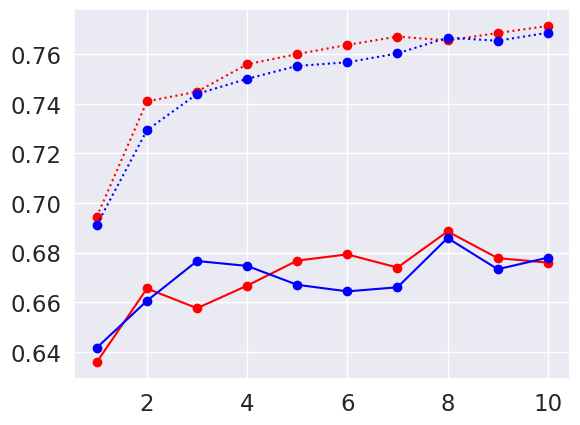

In [ ]:
# print line graph of random forest where max_depth=8
criterions = ['gini', 'entropy']
colors = ['red', 'blue']
n_list = list(range(1, 11))

# Initialize best_accuracy_forest before the loop
best_accuracy_forest = 0.0  # or any other suitable initial value

for i in range(len(criterions)):
    forest = RandomForestClassifier(criterion=criterions[i], max_depth=8)
    param_grid = [{'n_estimators': n_list}]
    gs = GridSearchCV(estimator=forest,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=10,
                      return_train_score=True) # Added return_train_score=True
    gs = gs.fit(x_dummy, y)
    print_cv_results(gs, 'Random Forest Accuracy')

    test_means = gs.cv_results_['mean_test_score']
    train_means = gs.cv_results_['mean_train_score']

    plt.plot(n_list, test_means, marker='o', label=f'{criterions[i]} Test Mean',
                color=colors[i])
    plt.plot(n_list, train_means, marker='o', label=f'{criterions[i]} Train Mean',
                linestyle='dotted', color=colors[i])
    # Update best_accuracy_forest if a better accuracy is found
    if gs.best_score_ > best_accuracy_forest:
        best_accuracy_forest = gs.best_score_

# Print the best accuracy for Random Forest
print(f'Random Forest Accuracy: {best_accuracy_forest:.2%}')

# Real-time prediction



In [ ]:
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression

# Load the model from disk
filename = 'logisticReg_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Get the best estimator from the loaded model
best_model = loaded_model.best_estimator_

# Sample movie data (replace with your real-time values)
# Include ALL possible genres the model was trained on
movie_data = {
    'budget': [10000000],
    'runtime': [120],
    'year': [2023],
    'vote_average': [7.5],
    'vote_count': [1000],
    'genre': ['Action'],
}

df = pd.DataFrame(movie_data)

predictors = ['budget','runtime','year','vote_average','vote_count','genre']
x_dummy = pd.get_dummies(df.loc[:,predictors])

# Ensure all columns from training data are present in x_dummy
for col in best_model.feature_names_in_:
    if col not in x_dummy.columns:
        x_dummy[col] = 0

# Make the prediction
prediction = best_model.predict(x_dummy)

# Print the prediction
if prediction[0]:
  print('The movie is predicted to be successful')
else:
  print('The movie is predicted to be not successful')

The movie is predicted to be successful


In [ ]:
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression

# Load the model from disk
filename = 'logisticReg_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Get the best estimator from the loaded model
best_model = loaded_model.best_estimator_

# Sample movie data (replace with your real-time values)
# Include ALL possible genres the model was trained on
movie_data = {
    'budget': [100000],
    'runtime': [90],
    'year': [2000],
    'vote_average': [4.0],
    'vote_count': [100],
    'genre': ['Drama'],
}

df = pd.DataFrame(movie_data)

predictors = ['budget','runtime','year','vote_average','vote_count','genre']
x_dummy = pd.get_dummies(df.loc[:,predictors])

# Ensure all columns from training data are present in x_dummy and in the correct order
for col in best_model.feature_names_in_:
    if col not in x_dummy.columns:
        x_dummy[col] = 0

# Reorder columns to match the order during training
x_dummy = x_dummy[best_model.feature_names_in_]

# Make the prediction
prediction = best_model.predict(x_dummy)

# Print the prediction
if prediction[0]:
  print('The movie is predicted to be successful')
else:
  print('The movie is predicted to be not successful')

The movie is predicted to be not successful
